# <center>*__Assignment 9: Mushroom Stew__*</center>

After years of training at such fine establishments as McDonald's, Jimboy's Tacos, and The Food Cart On the Corner of Broadway and Speer. Chef Hardlee Edaball (pronounced "hardly edible") has decided to break into the Denver restaurant scene, opening his new establishment "Fungus." Fungus is a farm to table concept, serving mushroom stews with ingredients sourced from Denver Metro landmarks such as, The Cherry Creek Bike Path, The Backyards of Frat houses in Boulder, and The Dumpster behind the Diamond Cabaret. With the much anticpated grand opening of Fungus drawing near, Chef Edaball needs a repeatable process for creating tasty stew to satisfy his clientel. A classification model should be developed to assist Chef Edaball in determing if mushrooms offered by local vendors meet the Fungus standard of excellence.

In [1]:
"""
import the necessary libraries
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [2]:
"""read in the mushroom data"""
shrooms = pd.read_table('agaricus-lepiota.data', delimiter=',', header=None)

In [3]:
"""rename columns for ease of use"""
colnames = [
    'poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruised', 'odor',
    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 
    'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
    'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
    'ring_type', 'spore_print_color', 'population', 'habitat'
]
shrooms.columns = colnames

## *_Exploratory Data Analysis_*

Nobody wants to die from eating mushroom stew. All poisonous mushrooms should be dropped from the dataset.

In [4]:
"""drop poisonous mushrooms"""
shrooms = shrooms[shrooms['poisonous'] != 'p'].copy()
shrooms.shape

(4208, 23)

In [5]:
"""check for duplicate data"""
shrooms.duplicated().sum()

0

In [6]:
"""View dataset head"""
shrooms.head()

,poisonous,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [7]:
"""check data types"""
shrooms.dtypes

poisonous                   object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruised                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

Part of making an appealing dish is the color of the final product. The different cap colors of mushrooms in the data should be visualized to give the chef an idea of what he has to work with.

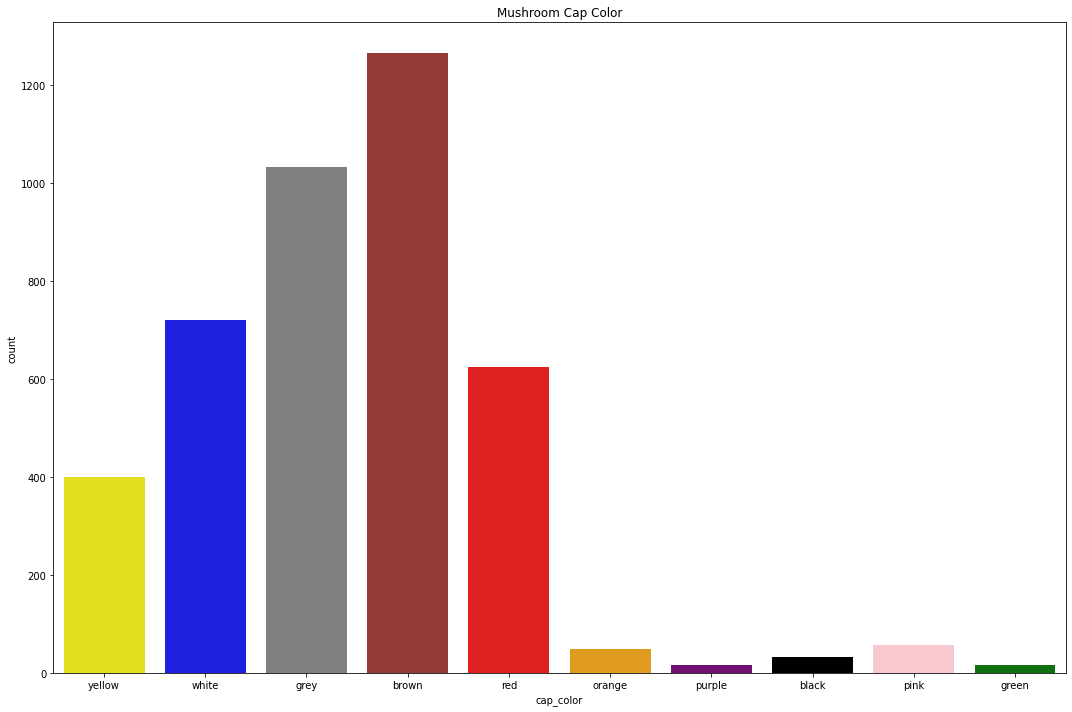

In [8]:
"""plot a count of different cap colors"""
color_dict = {'y': 'yellow', 'w':'blue', 'g':'grey','n':'brown','e':'red', 
              'b':'orange','u':'purple','c':'black','p':'pink','r':'green'}
fig, ax = plt.subplots(figsize=(15, 10))
count = sns.countplot(x='cap_color', data=shrooms, palette=color_dict)
ax.set_xticklabels(['yellow', 'white', 'grey', 'brown', 'red', 'orange', 'purple', 'black', 'pink', 'green'])
plt.title('Mushroom Cap Color')
plt.tight_layout()

How a dish smells is a determining factor in the first impression diners have when their meal is presented tableside. Visualizing the different odor of mushrooms in the data is therefore necessary.

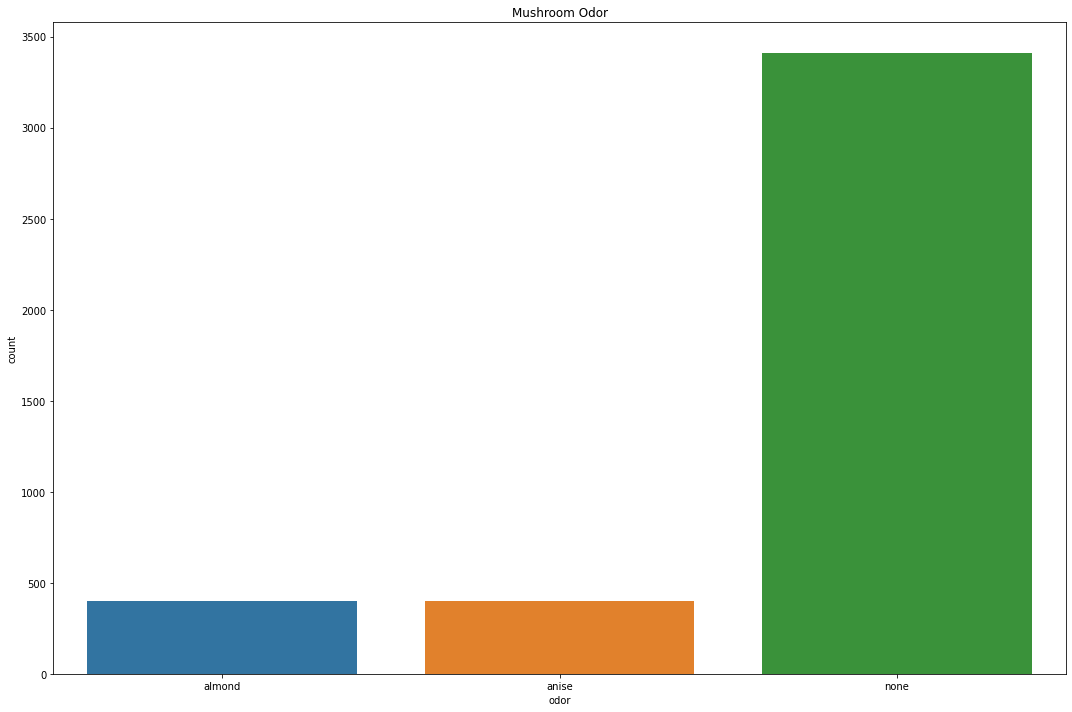

In [9]:
"""Plot a count of mushroom odor"""
fig, ax = plt.subplots(figsize=(15, 10))
count = sns.countplot(x='odor', data=shrooms)
ax.set_xticklabels(['almond', 'anise', 'none'])
plt.title('Mushroom Odor')
plt.tight_layout()

How about texture? People's preferences vary when it comes to the texture they prefer when eating stew. Let's take a look at what we have to work with. 

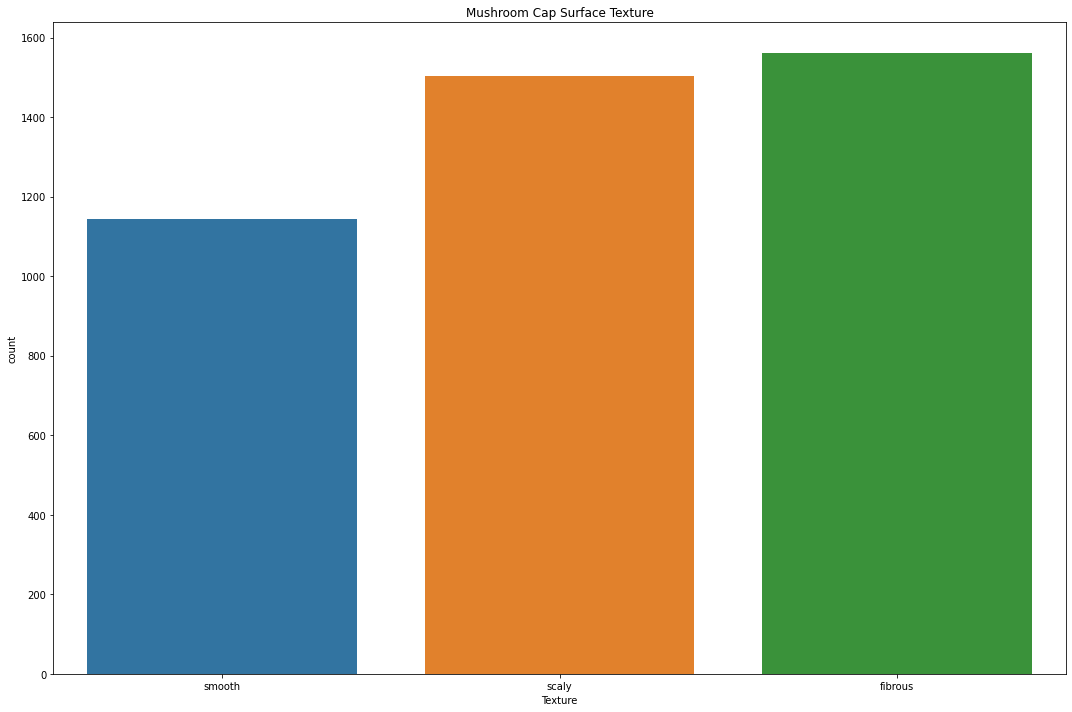

In [10]:
"""Plot a count of cap surface texture"""
fig, ax = plt.subplots(figsize=(15, 10))
count = sns.countplot(x='cap_surface', data=shrooms)
ax.set_xticklabels(['smooth', 'scaly', 'fibrous'])
plt.title('Mushroom Cap Surface Texture')
plt.xlabel('Texture')
plt.tight_layout()

In the Denver/Boulder metro area, consumers are conscious of the things they put in their body. How ingredients are sourced can be a determining factor when considering where to dine on a Friday evening. The chef needs to know the natural habitat of mushrooms in the data.

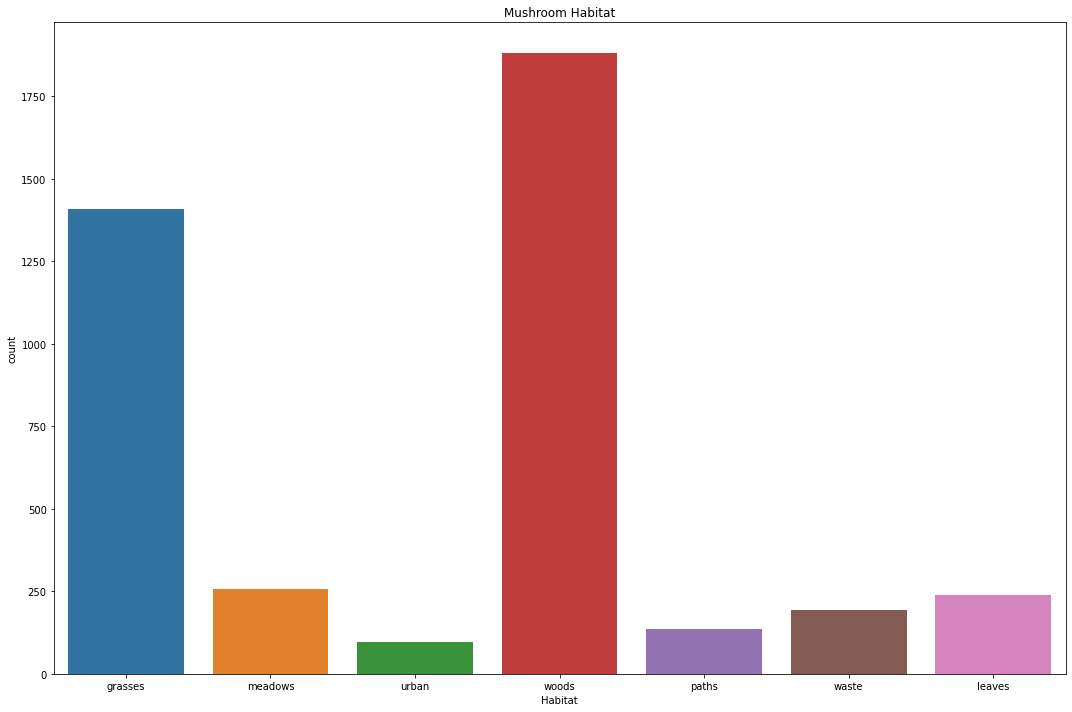

In [11]:
"""Plot a count of cap surface texture"""
fig, ax = plt.subplots(figsize=(15, 10))
count = sns.countplot(x='habitat', data=shrooms)
ax.set_xticklabels(['grasses', 'meadows', 'urban', 'woods', 'paths', 'waste', 'leaves'])
plt.title('Mushroom Habitat')
plt.xlabel('Habitat')
plt.tight_layout()

## *_Feature Engineering_*

Now that Chef Edaball has a good idea of the different ingredients he has to work with, its time to create some recipes.

- The Boulder (cap_color = yellow, odor = anise, texture = fibrous, habitat = woods)
- The Cap Hill (cap_color = brown, odor = none, texture = fibrous, habitat = urban)
- The Cherry Creek (cap_color = brown, odor = anise, texture = scaly, habitat = paths)
- The Stoner (cap_color = green, odor = almond, texture = any, habitat = waste)

Mushrooms not meeting the Chef's standards will be labeled "send_it_back."

In [12]:
"""create recipes, get idx using np.select(), assign recipe by idx"""
shrooms['the_recipe'] = 'send_it_back'
boulder_idx  = np.where((shrooms['cap_color'] == 'y') & (shrooms['odor'] == 'a') & (shrooms['cap_surface'] == 'f') & (shrooms['habitat'] == 'd'))
shrooms['the_recipe'].iloc[boulder_idx] = 'the_boulder'
cap_hill_idx  = np.where((shrooms['cap_color'] == 'n') & (shrooms['odor'] == 'n') & (shrooms['cap_surface'] == 'f') & (shrooms['habitat'] == 'u'))
shrooms['the_recipe'].iloc[cap_hill_idx] = 'the_cap_hill'
cherry_creek_idx  = np.where((shrooms['cap_color'] == 'n') & (shrooms['odor'] == 'a') & (shrooms['cap_surface'] == 'y') & (shrooms['habitat'] == 'p'))
shrooms['the_recipe'].iloc[cherry_creek_idx] = 'the_cherry_creek'
stoner_idx  = np.where((shrooms['cap_color'] == 'p') & (shrooms['odor'] == 'n') & (shrooms['habitat'] == 'w'))
shrooms['the_recipe'].iloc[stoner_idx] = 'the_stoner'

## *_Recipe Classification_*

- Multinomial Logistic Regression
- Support Vector Machine
- Naive Bayes

In [13]:
"""data preparation"""
# drop the poisonus column, no longer needed
shrooms.drop(columns=['poisonous'], inplace=True)
shrooms = shuffle(shrooms, random_state=14)
# split the data
x = shrooms.iloc[:, :-1]
y = shrooms.iloc[:, -1:]
# encode the data
le = LabelEncoder()
for col in x.columns:
    x[col] = le.fit_transform(x[col])
# scale the data
sc = StandardScaler()
x[x.columns] = sc.fit_transform(x)
# train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=14)
# flatten target to 1-D array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

/var/folders/s4/yckpqxmx6cnf837zqjqn_hxc0000gn/T/ipykernel_4420/829050169.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])
/var/folders/s4/yckpqxmx6cnf837zqjqn_hxc0000gn/T/ipykernel_4420/829050169.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x.columns] = sc.fit_transform(x)


In [14]:
"""multinomial logistic regression"""
# instantiate the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=14)
# fit and predict
model.fit(x_train, y_train)
predicted = model.predict(x_test)
# display basic model assessment
print(accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))

0.9960411718131433
                  precision    recall  f1-score   support

    send_it_back       1.00      1.00      1.00      1207
     the_boulder       1.00      0.17      0.29         6
    the_cap_hill       1.00      1.00      1.00        20
the_cherry_creek       1.00      1.00      1.00        10
      the_stoner       1.00      1.00      1.00        20

        accuracy                           1.00      1263
       macro avg       1.00      0.83      0.86      1263
    weighted avg       1.00      1.00      0.99      1263



Fitting a Multinomial Logistic Regression model to the data produced almost one hundred percent accuracy in classifying mushrooms to meet Chef Edeball's standards.

In [15]:
"support vector classifier"
# instantiate model
svc = SVC(random_state=14)
# fit and predict
svc.fit(x_train, y_train)
predicted = svc.predict(x_test)
# display basic model assessment
print(accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))

0.9635787806809184
                  precision    recall  f1-score   support

    send_it_back       0.96      1.00      0.98      1207
     the_boulder       0.00      0.00      0.00         6
    the_cap_hill       0.00      0.00      0.00        20
the_cherry_creek       1.00      1.00      1.00        10
      the_stoner       0.00      0.00      0.00        20

        accuracy                           0.96      1263
       macro avg       0.39      0.40      0.40      1263
    weighted avg       0.93      0.96      0.95      1263



/Users/benkarabinus/.local/share/virtualenvs/COMP4431-N1ravMBP/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benkarabinus/.local/share/virtualenvs/COMP4431-N1ravMBP/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benkarabinus/.local/share/virtualenvs/COMP4431-N1ravMBP/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Fitting a Support Vector Classifier implemented using scikit-learn proved to be approximately 96% accurate in classifying mushrooms for the different recipes on the Fungus menu. Despite the impressive accuracy of the model the results a re not valid. The model failed to properly classify anny msuhrooms as suitable for 3 out of the 4 recipes on the menu (the_boulder, the_cap_hill, and the_stoner).

In [16]:
"""Gausian Naive Bayes"""
# instantiate model
nb = GaussianNB()
# fit and predict
nb.fit(x_train, y_train)
predictions = nb.predict(x_test)
# display basic model assessment
print(accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))

0.9635787806809184
                  precision    recall  f1-score   support

    send_it_back       0.96      1.00      0.98      1207
     the_boulder       0.00      0.00      0.00         6
    the_cap_hill       0.00      0.00      0.00        20
the_cherry_creek       1.00      1.00      1.00        10
      the_stoner       0.00      0.00      0.00        20

        accuracy                           0.96      1263
       macro avg       0.39      0.40      0.40      1263
    weighted avg       0.93      0.96      0.95      1263



/Users/benkarabinus/.local/share/virtualenvs/COMP4431-N1ravMBP/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benkarabinus/.local/share/virtualenvs/COMP4431-N1ravMBP/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benkarabinus/.local/share/virtualenvs/COMP4431-N1ravMBP/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Fitting a Naive Bayes classification model to the data produced identical results to the support vector classification model. It simply won't do to have only 1 of 4 dishes on the menu available for opening night.

## *_Conclusion_*

Of the three classification models applied to the data, multinomial logistic regression produced the best results in identifying mushrooms needed to produce the 4 dishes on Fungus' menu. That being said, even the results of the multinomial logistic regression model cannot be considered truly valid. Due to Chef Edaball's high standards only 132 suitable mushrooms existed in the 4208 records used to train the classification models. To achieve valid results the recipe of each dish must be adjusted or further mushhroom data must be collected.